# Leads Score Assignment

## Problem Statement
    - An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

    - The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

    - Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

## Objectives 
    - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   
    - There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [166]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# reading the csv file in the notebook
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Understanding the Dataset

In [168]:
# Checking the shape of the dataframe
df.shape

(9240, 37)

In [169]:
# Checking the info of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [170]:
# Finding the percentage of null values in the dataset
round(100*(df.isnull().sum()/len(df.index)), 3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [171]:
# Checking the description of the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning the dataset

In [172]:
df = df.applymap(lambda i: i.lower() if type(i) == str else i)

In [173]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [174]:
# Targeting the 'Select' values as they are as good as NaN values
df = df.replace('select', np.nan)

In [175]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [176]:
# Checking for unique values
df.nunique()



Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [177]:
#removing the columns with 1 unique values 
df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [178]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [179]:
# Checking for null values again
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [180]:
# Removing the 'Asymmetric' columns as they have a lot of null values and it are not too significant for our analysis
df.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Activity Score'], axis = 1, inplace = True)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [182]:
df.drop(['Asymmetrique Profile Score'], axis = 1, inplace = True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [184]:
# Checking the percentage of the null value again
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [185]:
df.drop(['Tags', 'Lead Quality', 'Lead Profile', 'City'], axis = 1, inplace = True)

In [186]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [187]:
# If you look at the dataset manually, you will find a lot of empty spaces.
# That means the customer has not filled anything in that space and left it empty.
# To solve this issue we will replace the blank space with 'not provided'.
df['Country'] = df['Country'].fillna('not provided')

In [188]:
df['Specialization'] = df['Specialization'].fillna('not provided')

In [189]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna('not provided')

In [190]:
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')

In [191]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')

In [192]:
# Now let's check the null values again
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums          

In [193]:
# As the percentage of null values is low in 'TotalVisits', 'Page Views Per Visit', 'Last Activity'
# We can remove the rows with the null values.
df = df.dropna()

In [194]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                            

In [195]:
# checking the shape of the dataset after all the changes made
df.shape

(9074, 24)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [197]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [198]:
# Removing Id values since they are unique for everyone
df.drop('Prospect ID',axis = 1, inplace = True)
df.shape

(9074, 23)

## EDA

### Univariate Analysis

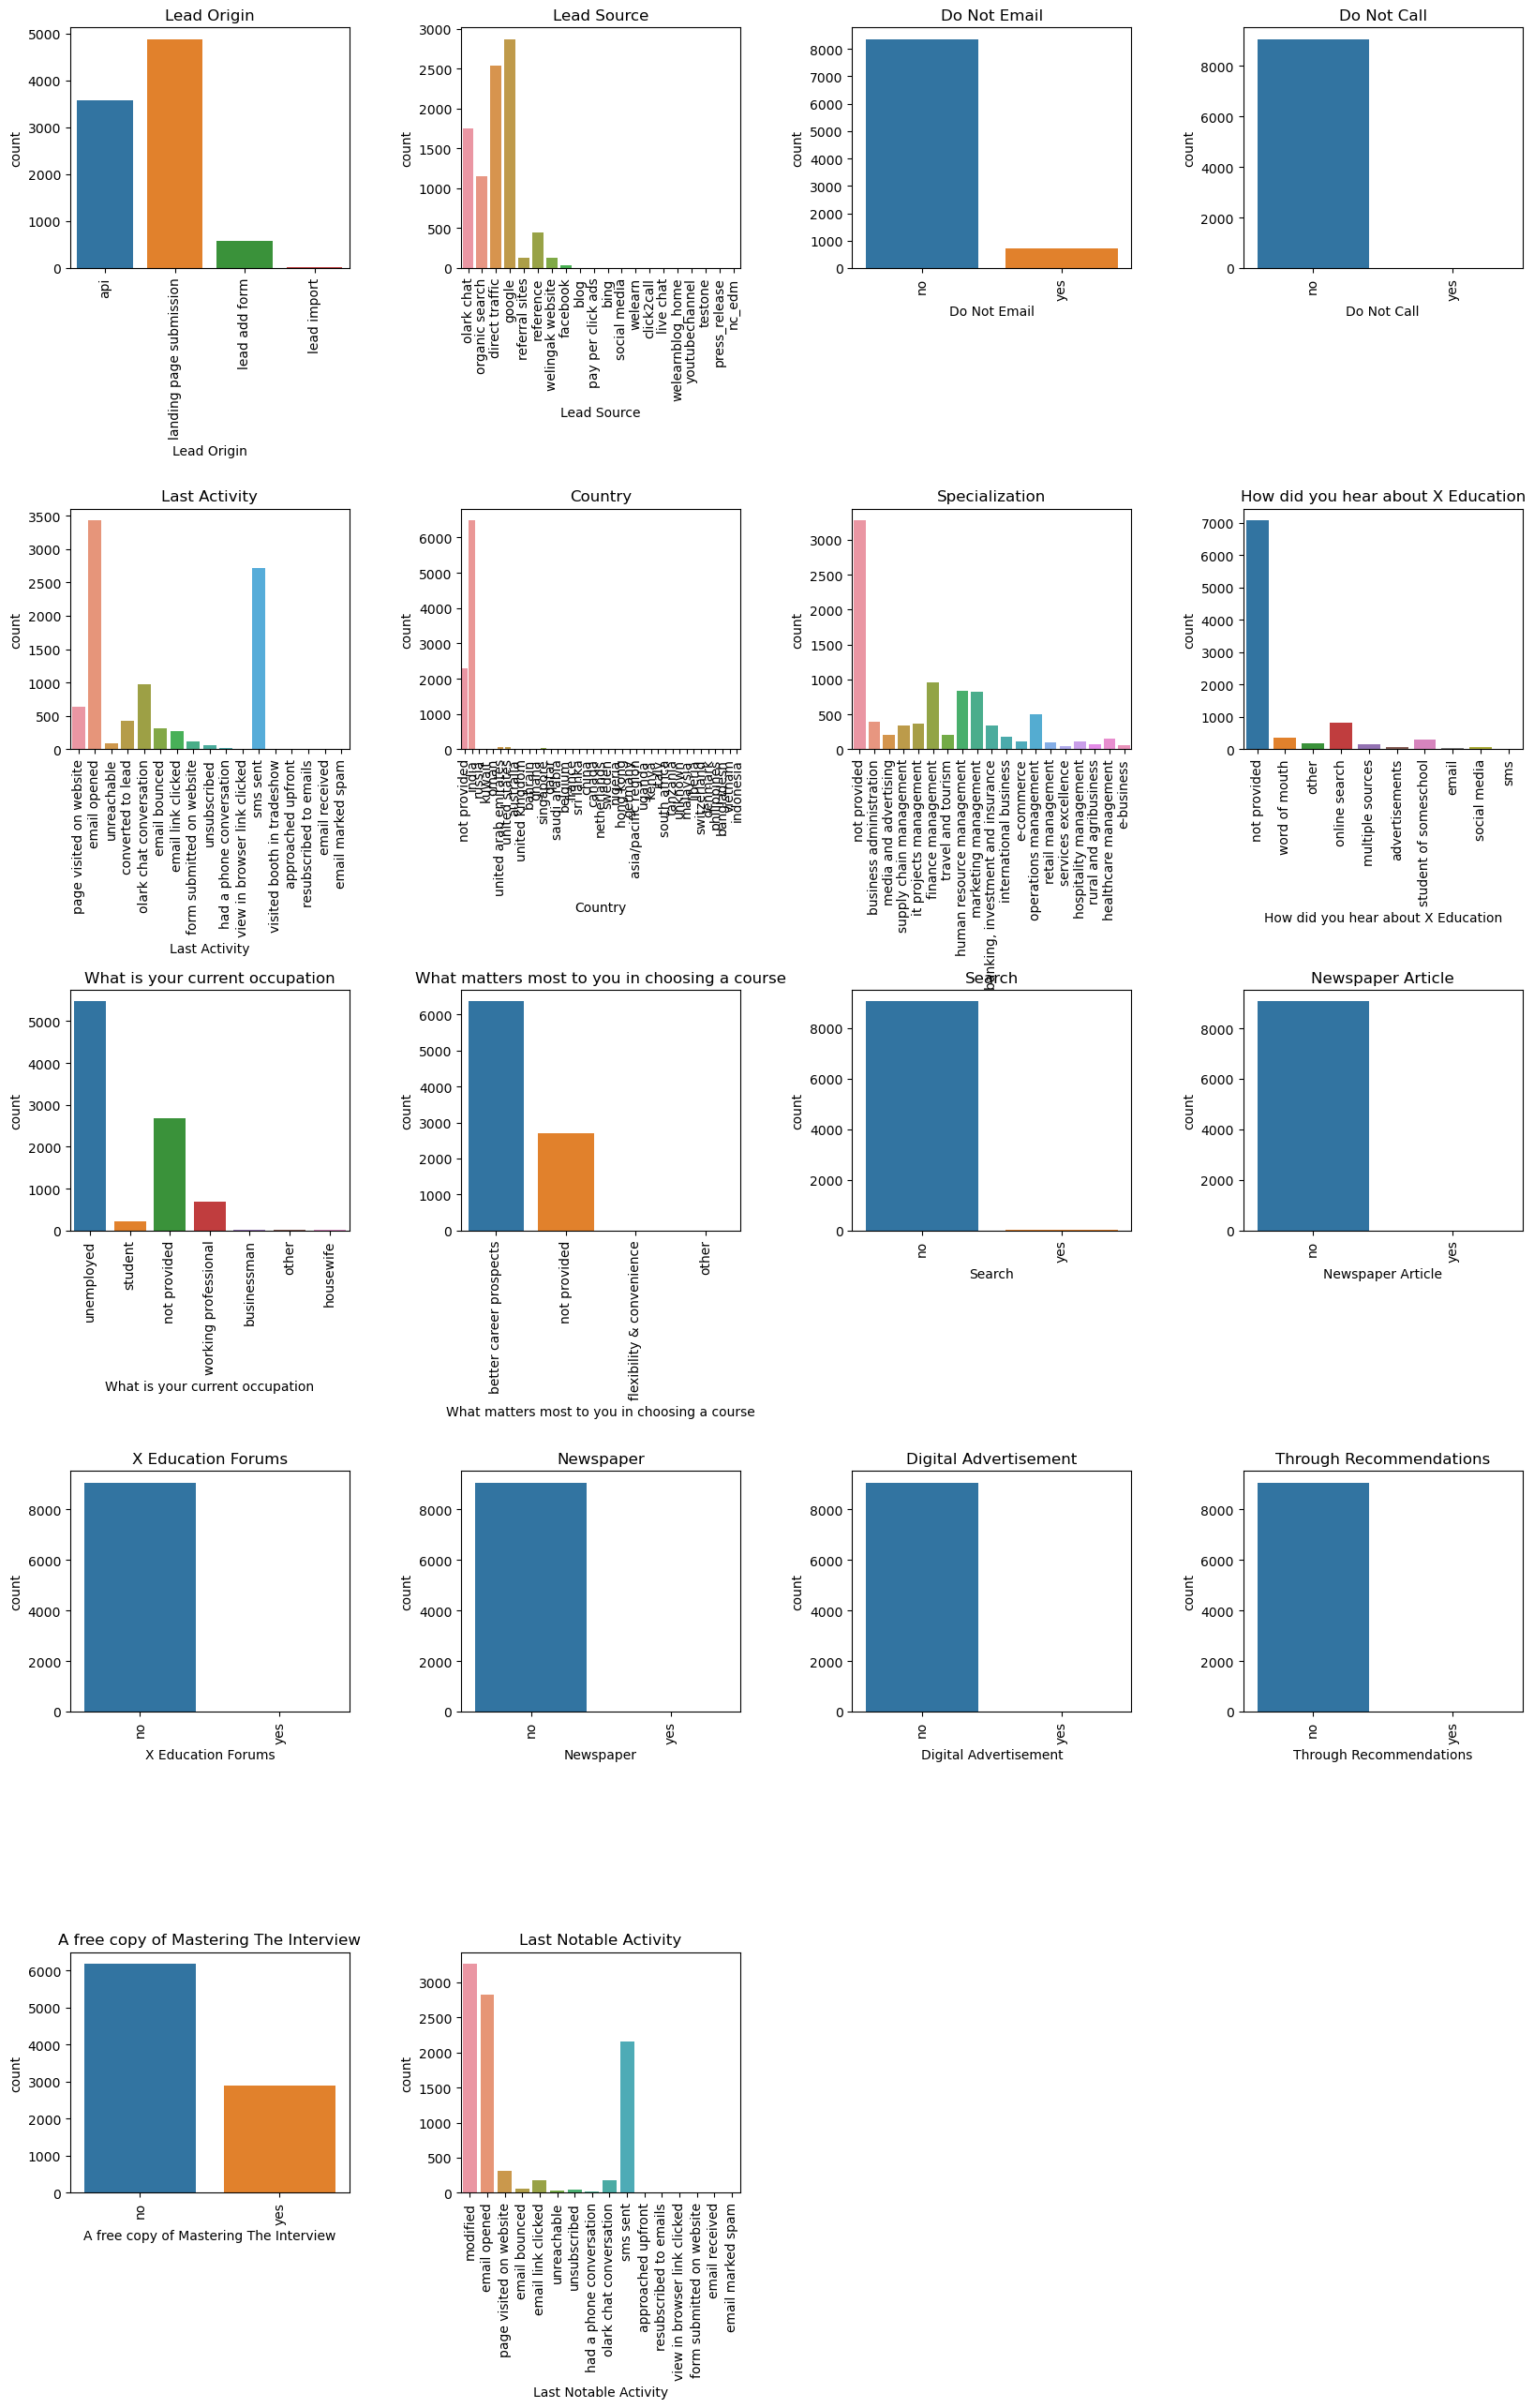

In [199]:
# Lets group all the categorical values together and visualize them
a = 5
b = 4
c = 1
plt.figure(figsize = [20, 30])
for i in df.columns:
    if df[i].dtype == 'object':
        plt.subplot(a, b, c)
        sns.countplot(x = df[i])
        plt.xticks(rotation = 90)
        plt.title(i)
        c = c + 1
plt.subplots_adjust(wspace=0.4, hspace=1.0)
plt.show()

In [200]:
# Let's clear out the country graph
def group(x):
    grp = ''
    if x == 'india':
        grp = 'india'
    elif x == 'not provided':
        grp = 'not provided'
    else:
        grp = 'outside india'
    return grp

In [201]:
df['Country'] = df.apply(lambda x:group(x['Country']), axis = 1)

In [202]:
df.Country.value_counts()

Country
india            6491
not provided     2296
outside india     287
Name: count, dtype: int64

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 non-n

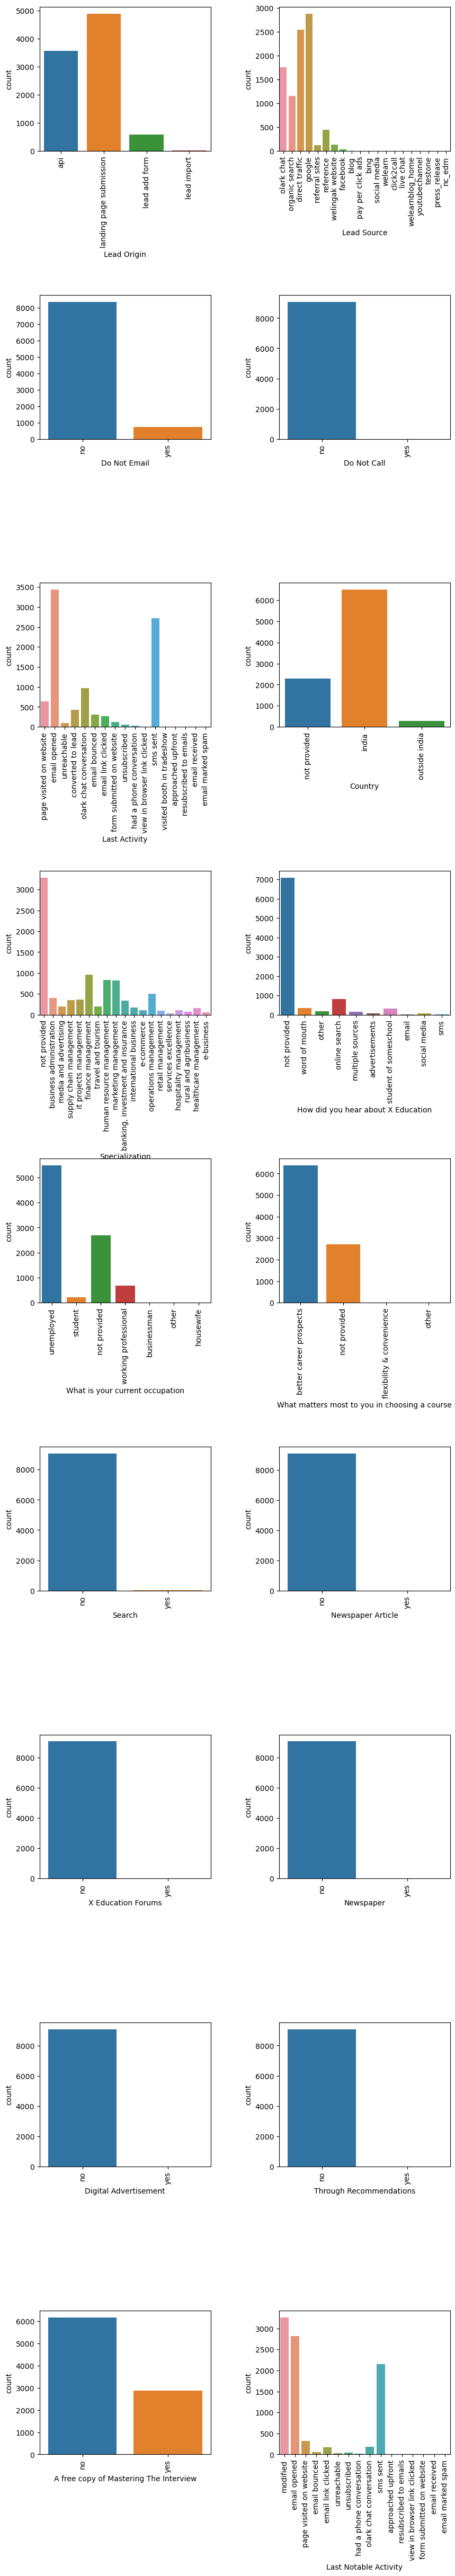

In [204]:
# Let's visualize the categorical data again

a = 9
b = 2
c = 1
plt.figure(figsize = [10, 60])
for i in df.columns:
    if df[i].dtype == 'object':
        plt.subplot(a, b, c)
        sns.countplot(x = df[i])
        plt.xticks(rotation = 90)
        #plt.title(i)
        c = c + 1

plt.subplots_adjust(wspace=0.4, hspace=1.0)
plt.show()

### Pointers:
- Majority of the customers submitted their forms on the landing page
- Majority of the customers are sourced out from Google
- 70 to 80 percent customers belong to India
- majority of the customers have completed their educationa and are choosing this course just for better job prospects

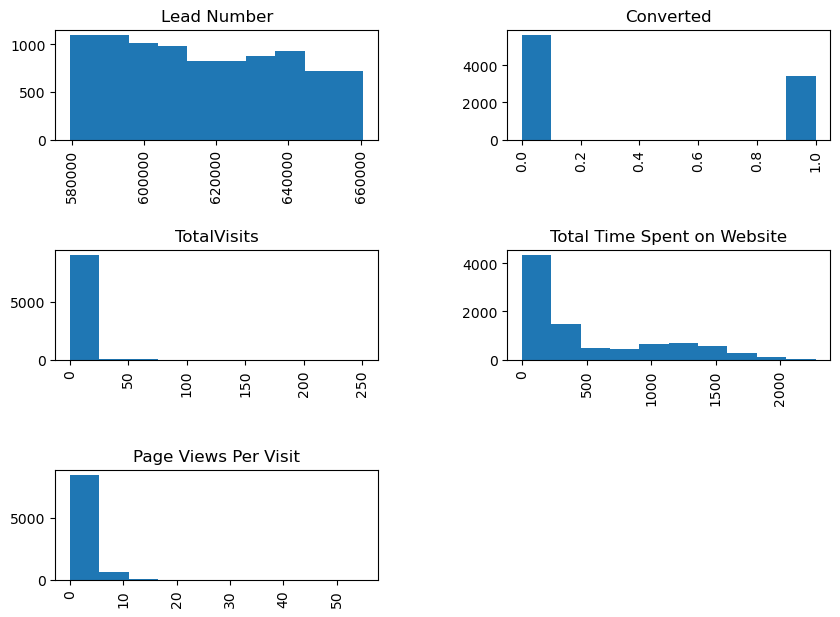

In [205]:
# Let's visualize the numerical data 
a = 4
b = 2
c = 1
plt.figure(figsize = [10, 10])
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        plt.subplot(a, b, c)
        plt.hist(x = df[i])
        plt.xticks(rotation = 90)
        plt.title(i)
        c = c + 1

plt.subplots_adjust(wspace=0.4, hspace=1.0)
plt.show()

### Bivariate Analysis

In [206]:
# Let's compare the categorical data with the Target variable 'Converted'
# Assigning a variable to all the categorical columns in the dataset

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_data = df[categorical_columns]

In [207]:
categorical_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,page visited on website,not provided,not provided,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,email opened,india,not provided,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,email opened,india,business administration,not provided,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,converted to lead,india,not provided,other,unemployed,better career prospects,no,no,no,no,no,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,email marked spam,outside india,it projects management,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,email marked spam
9236,landing page submission,direct traffic,no,no,sms sent,india,media and advertising,not provided,unemployed,better career prospects,no,no,no,no,no,no,yes,sms sent
9237,landing page submission,direct traffic,yes,no,sms sent,india,business administration,not provided,unemployed,better career prospects,no,no,no,no,no,no,yes,sms sent
9238,landing page submission,google,no,no,sms sent,india,human resource management,online search,not provided,not provided,no,no,no,no,no,no,no,sms sent


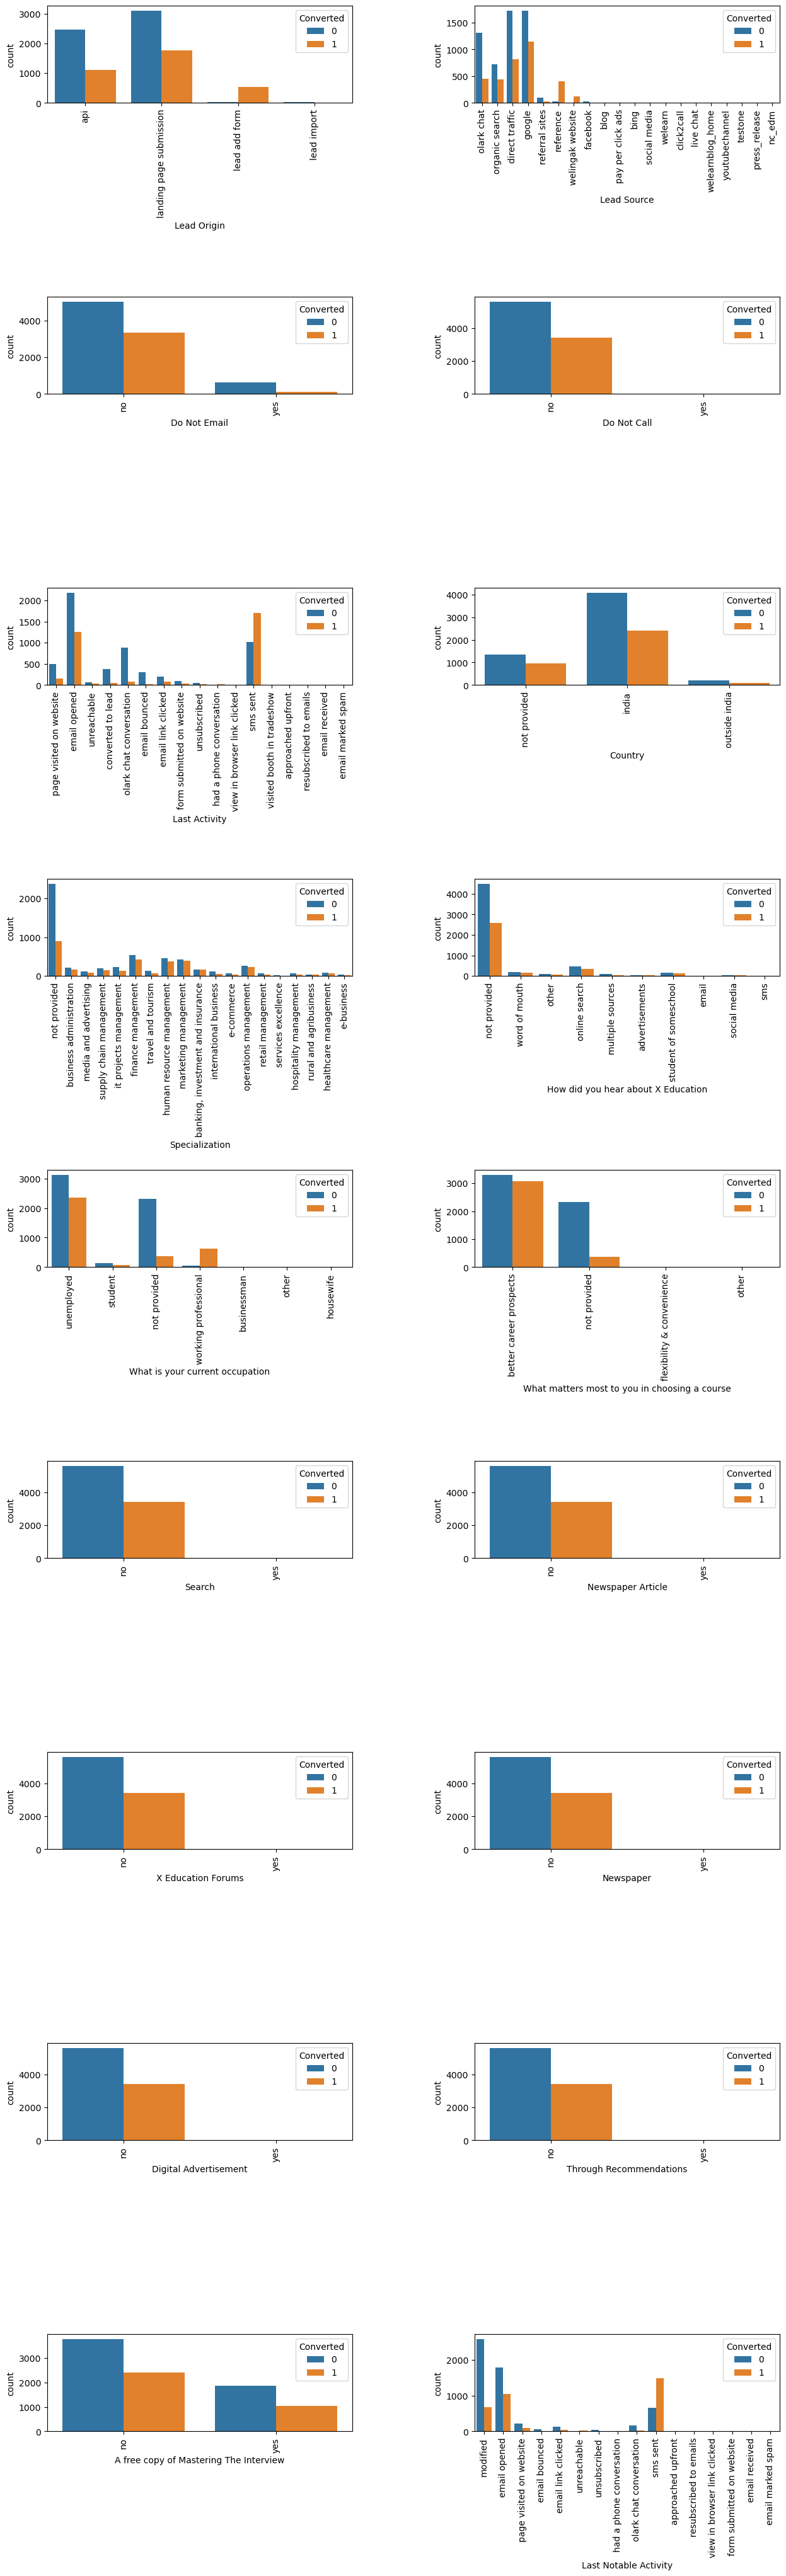

In [208]:
a = 9
b = 2
c = 1
plt.figure(figsize = [15, 50])
for i in categorical_data:
        plt.subplot(a, b, c)
        sns.countplot(x = i, hue = 'Converted', data = df)
        plt.xticks(rotation = 90)
        c = c + 1
plt.subplots_adjust(wspace=0.4, hspace=2.0)
plt.show()

### Pointers
- The majority of the customers that have converted have been sourced from Google.
- The last activity of the customers who have converted, is responding/acknowledging to the sms(s) and mails.
- Majority of the converted audience is from India.

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 non-n

In [210]:
# Removing Lead Number as well because it is a unique number assigned to a customer which is not significant to our analysis
df.drop('Lead Number', axis = 1, inplace = True)

In [211]:
Numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
Numerical_data = df[Numerical_columns]

In [212]:
# Checking for outliers
numeric = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


- As there are no significant outliers as such, we can go ahead and get on with out model building.

## Logistic Regression Model 

### Dummy Variables

In [213]:
# First we will go ahead and create dummy variables 
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [215]:
# The columns that we need to make dummies of are:
# Lead origin, Lead Source, Do not Email, Last Activity, Specialization, What is your current occupation, Last Notable activity
dum = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']], drop_first=True, dtype = int)
# Concat the dummy dataset to the master dataset
df = pd.concat([df, dum], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0


In [216]:
# Removing the original columns
df.drop(['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], axis = 1, inplace = True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 93 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Call                                           9074 non-null   object 
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Country                                               9074 non-null   object 
 6   How did you hear about X Education                    9074 non-null   object 
 7   What matters most to you in choosing a course         9074 non-null   object 
 8   Search                                                9074 non-

In [218]:
# Additionally we can remove a few more columns that are not necessary
df.drop(['Do Not Call', 'Country', 'Specialization_not provided', 'What matters most to you in choosing a course', 'X Education Forums', 'Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview'], axis = 1, inplace = True)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   How did you hear about X Education                    9074 non-null   object 
 5   Lead Origin_landing page submission                   9074 non-null   int32  
 6   Lead Origin_lead add form                             9074 non-null   int32  
 7   Lead Origin_lead import                               9074 non-null   int32  
 8   Specialization_business administration                9074 non-

In [220]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,not provided,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,not provided,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,not provided,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,word of mouth,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,other,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Test-Train Model

In [221]:
# Import the required libraries
from sklearn.model_selection import train_test_split

In [222]:
# Splitting the dataset 
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print('df_train =',df_train.shape)
print('df_test =',df_test.shape)

df_train = (6351, 82)
df_test = (2723, 82)


In [223]:
# Identifying the X and y variables
X_train = df_train
y_train = df_train.pop('Converted')

In [224]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,2.0,397,2.0,not provided,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,2.0,190,2.0,not provided,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.0,0,0.0,not provided,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,2.0,1380,2.0,multiple sources,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,5.0,1584,2.5,word of mouth,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [225]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [226]:
# Scaling the numeric variables in the dataset
from sklearn.preprocessing import MinMaxScaler

In [227]:
# Scaling 'Time Spent on Website', 'Page Views Per Visit', 'Total Visit' to the rest of the dataset
scaler = MinMaxScaler()
num_var = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.007968,0.178347,0.083333,not provided,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,not provided,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,not provided,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,multiple sources,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,word of mouth,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [228]:
X_train.drop('How did you hear about X Education', axis = 1, inplace = True)

<Axes: >

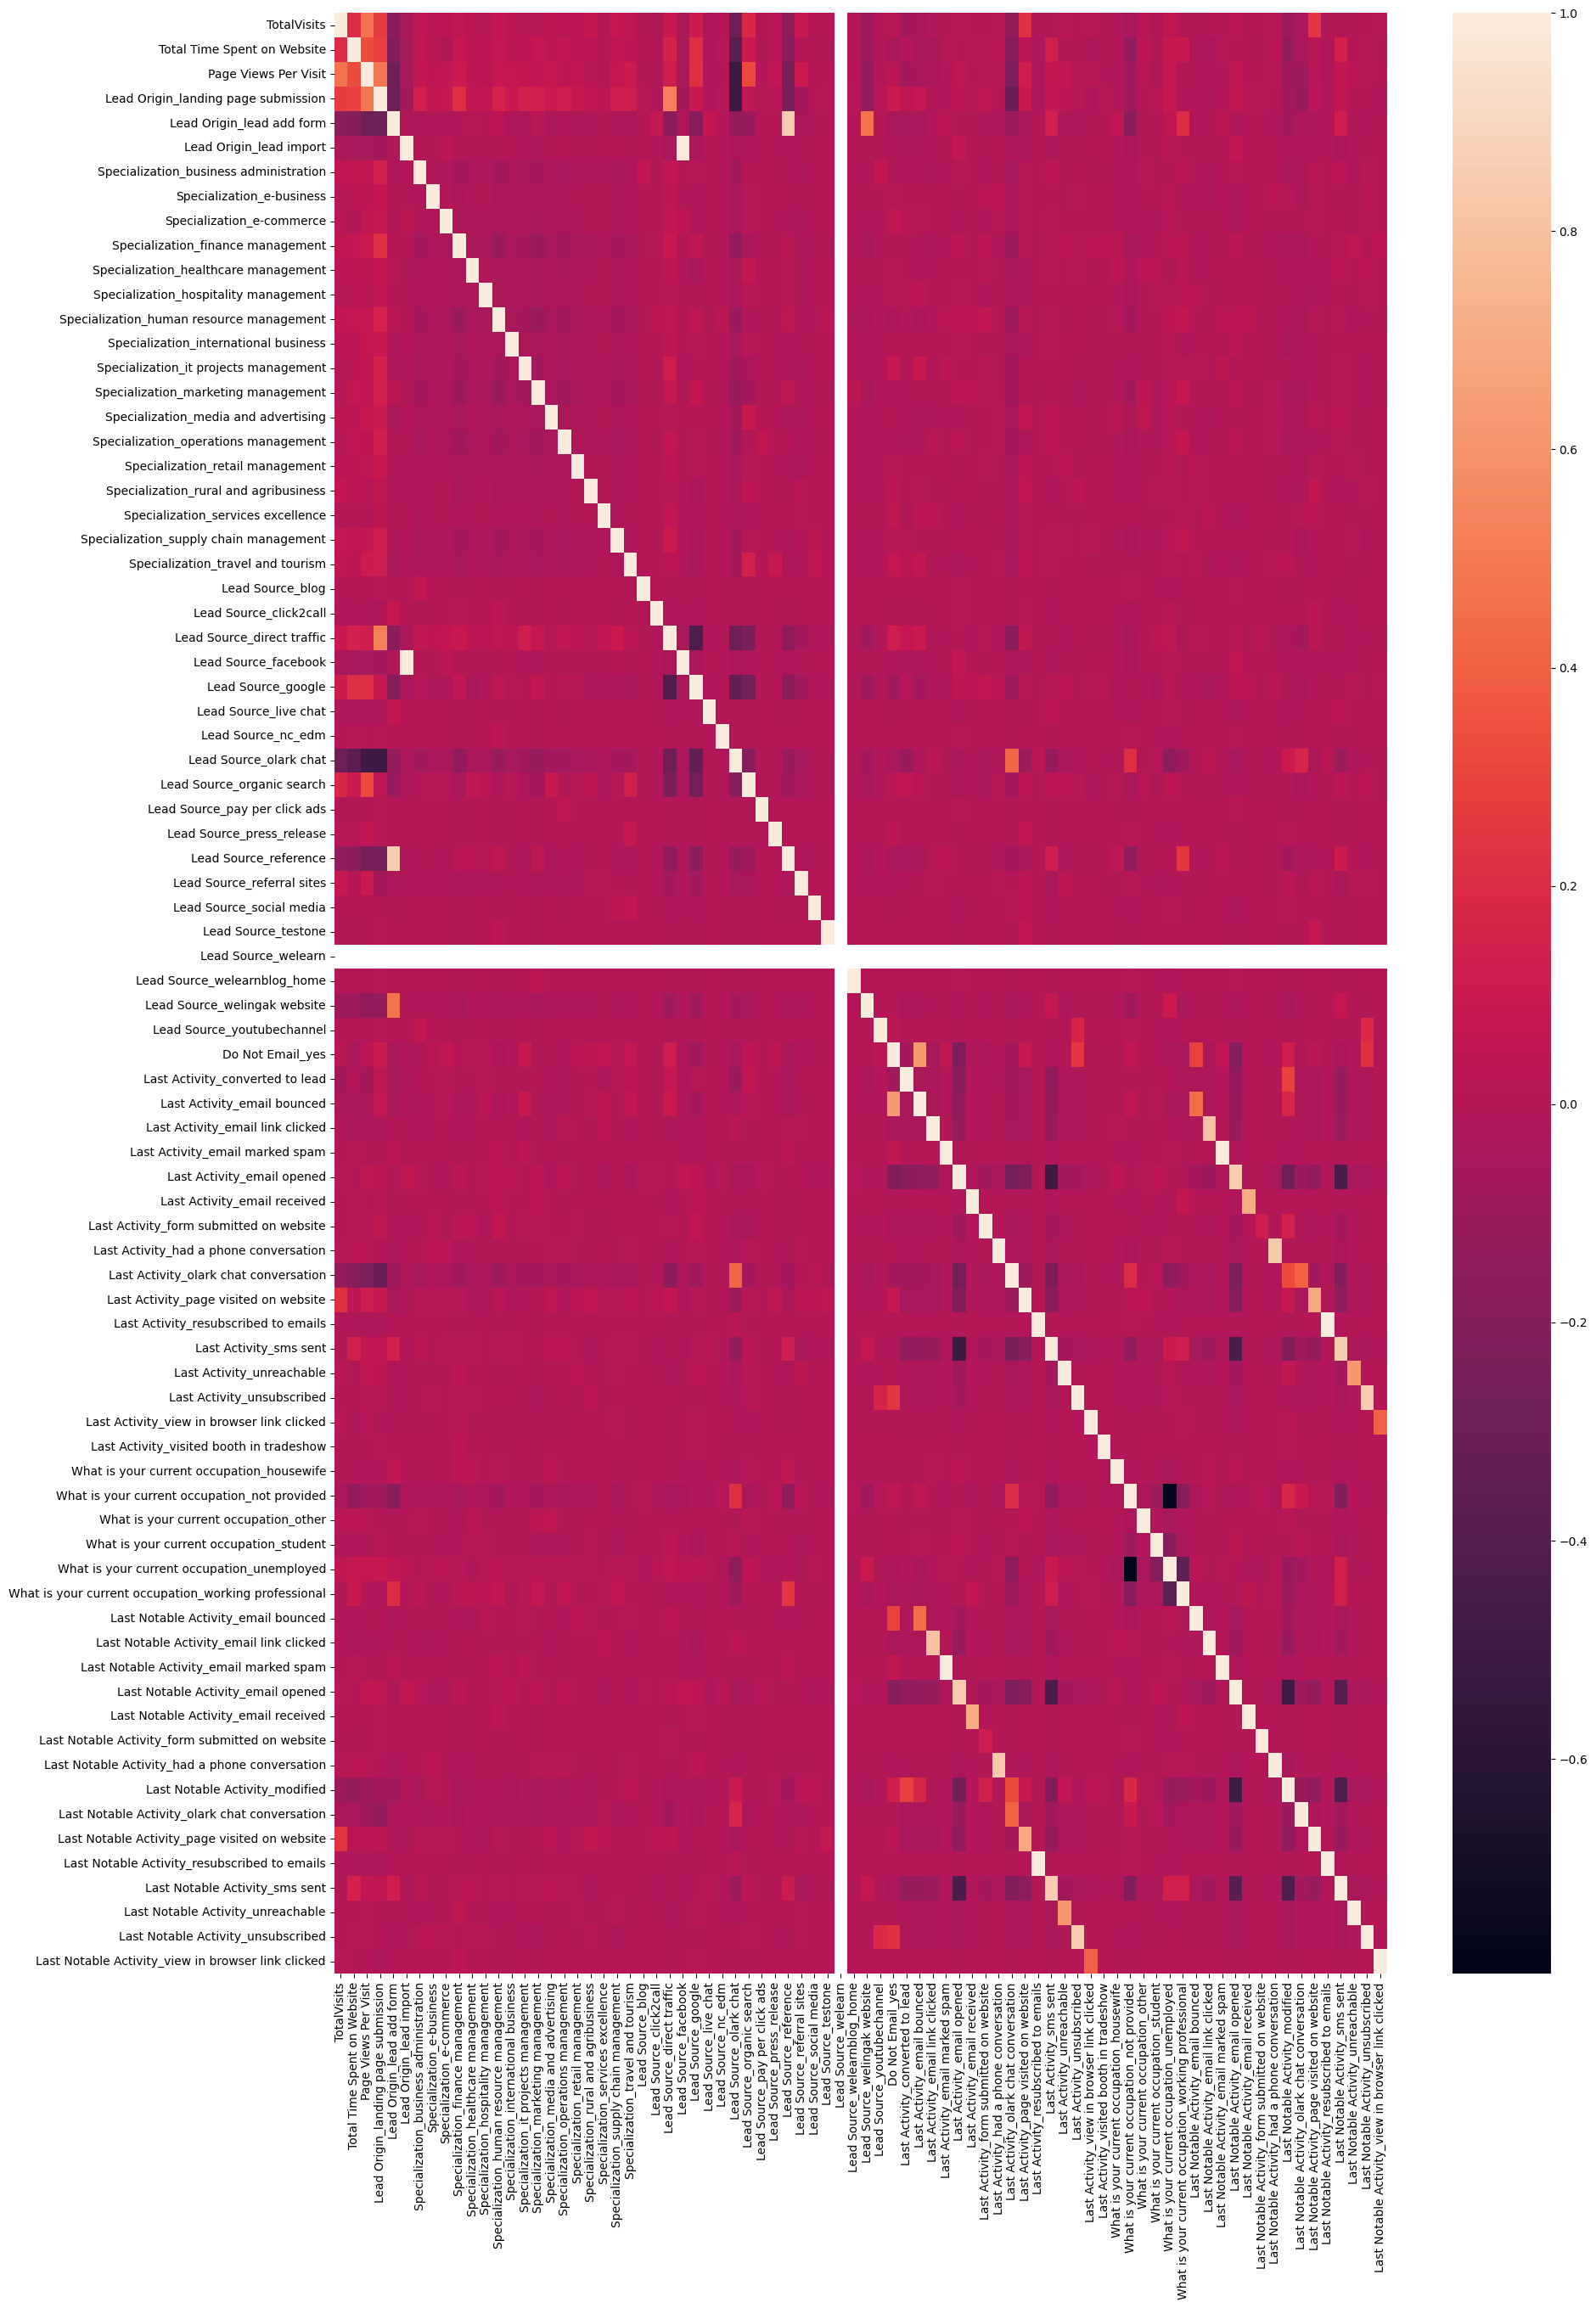

In [229]:
# Checking the correlation between variables
plt.figure(figsize = (20, 30))
sns.heatmap(X_train.corr())

- Since there are a lot of variables, it is tough to make out correlations between variables from the graph and remove the variables accordingly. 
- Hence we will use RFE to remove the variables.

In [230]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [231]:
# Initializing Logisitc Regression
logreg = LogisticRegression()

In [232]:
# Importing RFE
from sklearn.feature_selection import RFE

In [233]:
# Running RFE and outputting 15 variables
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

C:\Users\gsivo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gsivo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [234]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', False, 30),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 38),
 ('Specialization_e-business', False, 27),
 ('Specialization_e-commerce', False, 29),
 ('Specialization_finance management', False, 33),
 ('Specialization_healthcare management', False, 32),
 ('Specialization_hospitality management', False, 59),
 ('Specialization_human resource management', False, 34),
 ('Specialization_international business', False, 42),
 ('Specialization_it projects management', False, 31),
 ('Specialization_marketing management', False, 28),
 ('Specialization_media and advertising', False, 55),
 ('Specialization_operations management', False, 36),
 ('Specialization_retail management', False, 50),
 ('Specialization_rural and agribusiness', False, 37),
 ('Specialization_ser

In [235]:
# Put all the columns selected by RFE in the variable 'sel_col'
sel_col = X_train.columns[rfe.support_]

In [236]:
# Now that the features are selected, we can start with the statistical part
X_train = X_train[sel_col]

In [237]:
# importing statsmodel
import statsmodels.api as sm

In [238]:
# First we will need to add a constant in the dataset
X_train_sm = sm.add_constant(X_train)

In [239]:
X_train_sm.head()

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_working professional,Last Notable Activity_unreachable
3009,1.0,0.178347,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1012,1.0,0.085355,0,1,0,0,0,1,0,0,0,0,0,0,1,0
9226,1.0,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4750,1.0,0.619946,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7987,1.0,0.711590,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [240]:
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.6
Date:                Fri, 17 May 2024   Deviance:                       5251.1
Time:                        19:52:11   Pearson chi2:                 6.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3800      0.069    -19.991      0.000      -1.515      -1.245
Total Time Spent on Website                              3.9322      0.148     26.603      0.000       3.642       4.222
Lead Origin_lead add form                                2.8860      0.219     13.194      0.000       2.457       3.315
Lead Source_direct traffic                              -0.6902      0.082     -8.384      0.000      -0.852      -0.529
Lead Source_organic search                              -0.5432      0.106     -5.134      0.000      -0.751      -0.336
Lead Source_referral sites                              -0.7715      0.343     -2.251      0.024      -1.443      -0.100
Lead Source_welingak website                             1.9727      0.750      2.629      0.009       0.502       3.443
Do Not Email_yes                                        -1.5851      0.170     -9.310      0.000      -1.919      -1.251
Last Activity_converted to lead                         -1.3371      0.219     -6.115      0.000      -1.766      -0.909
Last Activity_had a phone conversation                   2.3265      0.718      3.239      0.001       0.919       3.734
Last Activity_olark chat conversation                   -1.0525      0.163     -6.469      0.000      -1.371      -0.734
Last Activity_sms sent                                   1.2219      0.074     16.419      0.000       1.076       1.368
What is your current occupation_housewife               22.6237   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
What is your current occupation_not provided            -1.2436      0.087    -14.246      0.000      -1.415      -1.072
What is your current occupation_working professional     2.4550      0.186     13.213      0.000       2.091       2.819
Last Notable Activity_unreachable                        1.8718      0.505      3.704      0.000       0.881       2.862
========================================================================================================================
"""

In [241]:
# Checking the VIF
# Importing Variance Inflation Factor to measure the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [242]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.67
1,Lead Origin_lead add form,1.50
10,Last Activity_sms sent,1.45
2,Lead Source_direct traffic,1.44
5,Lead Source_welingak website,1.33
12,What is your current occupation_not provided,1.31
3,Lead Source_organic search,1.20
13,What is your current occupation_working profes...,1.19
9,Last Activity_olark chat conversation,1.14
6,Do Not Email_yes,1.11


- The VIF of the 1st model seems good but the P value is very off.
- So, removing 'What is your current occupation_housewife' as the P value is very high

In [243]:
# Dropping 
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

C:\Users\gsivo\AppData\Local\Temp\ipykernel_23908\634181013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)


In [244]:
# 2nd Model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.8
Date:                Fri, 17 May 2024   Deviance:                       5259.7
Time:                        19:52:11   Pearson chi2:                 6.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3964
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3762      0.069    -19.953      0.000      -1.511      -1.241
Total Time Spent on Website                              3.9313      0.148     26.624      0.000       3.642       4.221
Lead Origin_lead add form                                2.9074      0.218     13.311      0.000       2.479       3.336
Lead Source_direct traffic                              -0.6878      0.082     -8.363      0.000      -0.849      -0.527
Lead Source_organic search                              -0.5327      0.106     -5.046      0.000      -0.740      -0.326
Lead Source_referral sites                              -0.7723      0.343     -2.254      0.024      -1.444      -0.101
Lead Source_welingak website                             1.9506      0.750      2.600      0.009       0.480       3.421
Do Not Email_yes                                        -1.5890      0.170     -9.333      0.000      -1.923      -1.255
Last Activity_converted to lead                         -1.3425      0.219     -6.141      0.000      -1.771      -0.914
Last Activity_had a phone conversation                   2.3207      0.719      3.230      0.001       0.912       3.729
Last Activity_olark chat conversation                   -1.0564      0.163     -6.493      0.000      -1.375      -0.738
Last Activity_sms sent                                   1.2163      0.074     16.353      0.000       1.071       1.362
What is your current occupation_not provided            -1.2463      0.087    -14.282      0.000      -1.417      -1.075
What is your current occupation_working professional     2.4503      0.186     13.187      0.000       2.086       2.815
Last Notable Activity_unreachable                        1.8670      0.505      3.695      0.000       0.877       2.857
========================================================================================================================
"""

In [245]:
# Checking the VIF of the 2nd model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.66
1,Lead Origin_lead add form,1.49
10,Last Activity_sms sent,1.45
2,Lead Source_direct traffic,1.44
5,Lead Source_welingak website,1.33
11,What is your current occupation_not provided,1.31
3,Lead Source_organic search,1.20
12,What is your current occupation_working profes...,1.19
9,Last Activity_olark chat conversation,1.14
6,Do Not Email_yes,1.11


- The P values are all good and under 0.05 now.
- We can proceed with making the predictions

## Prediction

In [246]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:5]

3009    0.068549
1012    0.295857
9226    0.460114
4750    0.584960
7987    0.875420
dtype: float64

In [247]:
# Lets check the already predicted values and the values that the model has predicted
y_train_pred_df = pd.DataFrame({'Converted': y_train.values, 'Prob_Conversion': y_train_pred})
y_train_pred_df.head()

,Converted,Prob_Conversion
3009,0,0.068549
1012,0,0.295857
9226,0,0.460114
4750,1,0.584960
7987,1,0.875420


In [248]:
# Creating a new column for if the conversion is greater than 0.5
y_train_pred_df['Predicted'] = y_train_pred_df.Prob_Conversion.map(lambda x: 1 if x > 0.5 else 0)

In [249]:
# Lets verify
y_train_pred_df.head(10)

,Converted,Prob_Conversion,Predicted
3009,0,0.068549,0
1012,0,0.295857,0
9226,0,0.460114,0
4750,1,0.584960,1
7987,1,0.875420,1
1281,1,0.828914,1
2880,0,0.068153,0
4971,1,0.926089,1
7536,1,0.806793,1
1248,0,0.857674,1


## Model Evaluation

In [250]:
# Importing metrics from sklearn
from sklearn import metrics

In [251]:
# Building a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted)
print(confusion)

[[3448  457]
 [ 792 1654]]


In [252]:
# Let's check the overall accuracy 
accuracy = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)

In [253]:
print(accuracy)

0.8033380569988978


- 81% of accuracy is pretty good

In [254]:
# Calculating the specificity, sensitivity of our model
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
#Let's check the specificity of the model
TN/float(TN+FP)

0.8829705505761843

In [256]:
# Let's check the sensitivity of the model
TP/float(TP+FN)

0.6762060506950123

## Plotting the ROC curve

In [257]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [258]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Prob_Conversion, drop_intermediate = False )

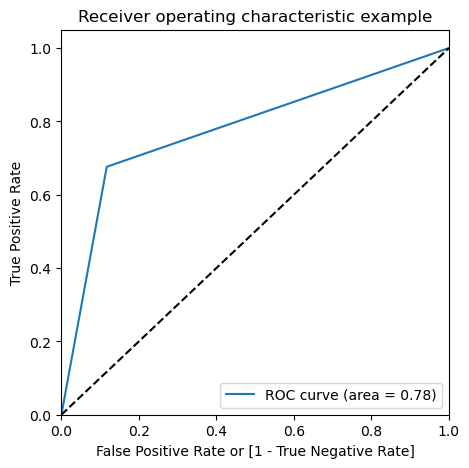

In [259]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Predicted)

In [260]:
# Creating columns with different probability cutoffs to find the optimal cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Prob_Conversion.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Prob_Conversion,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.068549,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.295857,0,1,1,1,0,0,0,0,0,0,0
9226,0,0.460114,0,1,1,1,1,1,0,0,0,0,0
4750,1,0.584960,1,1,1,1,1,1,1,0,0,0,0
7987,1,0.875420,1,1,1,1,1,1,1,1,1,1,0


In [261]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.628562,0.979558,0.408707
0.2,0.2,0.726500,0.928046,0.600256
0.3,0.3,0.785703,0.839738,0.751857
0.4,0.4,0.806645,0.780049,0.823303
0.5,0.5,0.803338,0.676206,0.882971
0.6,0.6,0.797040,0.600981,0.919846
0.7,0.7,0.782082,0.518397,0.947247
0.8,0.8,0.759880,0.429272,0.966965
0.9,0.9,0.712171,0.271464,0.988220


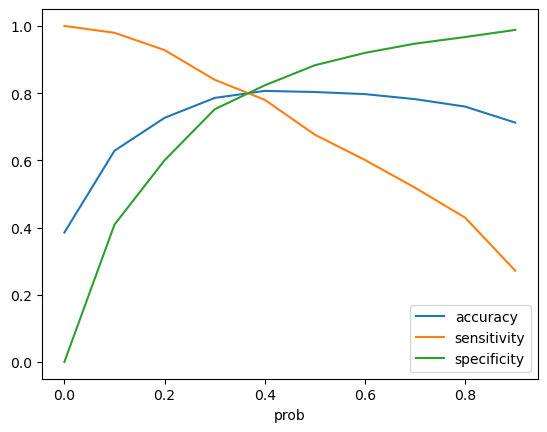

In [262]:
# Plotting the DataFrame
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

- From the Visual we can make out that the optimal cutoff is alomst 0.37

In [263]:
# Updtaing the final Predicted value
y_train_pred_df['final_predicted'] = y_train_pred_df.Prob_Conversion.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_df.head()

,Converted,Prob_Conversion,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.068549,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.295857,0,1,1,1,0,0,0,0,0,0,0,0
9226,0,0.460114,0,1,1,1,1,1,0,0,0,0,0,1
4750,1,0.584960,1,1,1,1,1,1,1,0,0,0,0,1
7987,1,0.875420,1,1,1,1,1,1,1,1,1,1,0,1


In [264]:
# Calculating the accuracy of the model again
acc = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

In [265]:
# Calculating the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
print(confusion2)

[[3152  753]
 [ 499 1947]]


In [266]:
# Calculating the specificity, sensitivity of our model
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [267]:
# Calculating the sensitivity of the updated model
sen = TP/float(TP+FN)

In [268]:
# Calculating the specificity of the model
spe = TN/(TN+FP)

In [269]:
new_eval = pd.DataFrame({'Accuracy': acc, 'Specificity': spe, 'Sensitivity': sen}, index = [0])
print(new_eval)

   Accuracy  Specificity  Sensitivity
0  0.802866      0.80717     0.795993


- With the current cutoff the accuracy, specificity and sensitivity, all of them are around 80%

## Predicting on the test dataset

In [270]:
X_test = df_test
y_test = df_test.pop('Converted')

In [271]:
Num_var = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_test[Num_var] = scaler.fit_transform(X_test[Num_var])

In [272]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3271,0.054054,0.069102,0.072727,not provided,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.067568,0.665933,0.090909,not provided,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0.027027,0.032570,0.036364,not provided,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0.000000,0.000000,0.000000,not provided,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3830,0.108108,0.072183,0.145455,not provided,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
X_test.drop('How did you hear about X Education', inplace = True, axis = 1)

In [274]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3271,0.054054,0.069102,0.072727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.067568,0.665933,0.090909,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0.027027,0.032570,0.036364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3830,0.108108,0.072183,0.145455,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
sel_col2 = X_train.columns

In [276]:
# Matching the cols of the train dataset with the test dataset
X_test = X_test[sel_col2]

In [277]:
X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_not provided,What is your current occupation_working professional,Last Notable Activity_unreachable
3271,0.069102,0,0,0,0,0,0,0,0,0,0,1,0,0
1490,0.665933,0,1,0,0,0,0,0,0,0,0,0,1,0
7936,0.032570,0,0,0,0,0,0,0,0,0,0,1,0,0
4216,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,0.072183,0,0,1,0,0,0,0,0,0,0,1,0,0


In [278]:
# Adding a constant to the test dataset
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_not provided,What is your current occupation_working professional,Last Notable Activity_unreachable
3271,1.0,0.069102,0,0,0,0,0,0,0,0,0,0,1,0,0
1490,1.0,0.665933,0,1,0,0,0,0,0,0,0,0,0,1,0
7936,1.0,0.032570,0,0,0,0,0,0,0,0,0,0,1,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,1.0,0.072183,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.364877,0,0,0,0,0,0,1,0,0,0,1,0,0
2879,1.0,0.259243,0,0,0,0,0,0,1,0,0,0,0,0,0
6501,1.0,0.587588,0,1,0,0,0,0,0,0,0,1,0,0,0
7155,1.0,0.226673,0,1,0,0,0,0,0,0,0,0,1,0,0


In [279]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = result.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.087001
1,1,0.952769
2,0,0.076249
3,1,0.822191
4,0,0.053586


In [280]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.087001,0
1,1,0.952769,1
2,0,0.076249,0
3,1,0.822191,1
4,0,0.053586,0
...,...,...,...
2718,0,0.073743,0
2719,0,0.154525,0
2720,1,0.811879,1
2721,0,0.081720,0


#### Evaluating the test dataset

In [281]:
# Accuracy 
acc2 = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [282]:
# confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1422,  312],
       [ 211,  778]], dtype=int64)

In [283]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [284]:
# Sensitivity
sen2 = TP/(TP+FN)

In [285]:
# Specificity
spe2 = TN/(TN+FP)

In [286]:
new_eval2 = pd.DataFrame({'Accuracy': acc2, 'Sensitivity': sen2, 'Specificity': spe2}, index = [0])

In [287]:
new_eval2

,Accuracy,Sensitivity,Specificity
0,0.807932,0.786653,0.820069


- So the accuracy, specificity and sensitivity of our test dataset comes out to be around 80%.

In [288]:
confusion

array([[3448,  457],
       [ 792, 1654]], dtype=int64)

#### Precision - Recall tradeoff

In [289]:
# Precision is calculated by TP/TP+FP
pre = confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [290]:
# Recal is calculated by TP/TP+FN
rec = confusion[1,1]/(confusion[1,0]+confusion[1,1])

In [291]:
prec = pd.DataFrame({'Precision': pre, 'Recall': rec}, index = [0])

In [292]:
prec

,Precision,Recall
0,0.783515,0.676206


In [293]:
# Importing the precision recall curve library
from sklearn.metrics import precision_recall_curve

In [294]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Prob_Conversion)

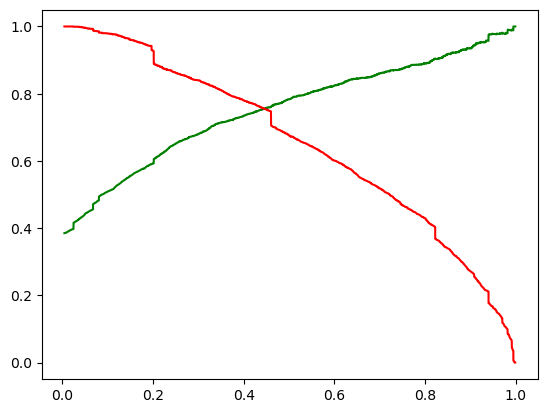

In [295]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [296]:
#0.43
y_train_pred_df['final_predicted'] = y_train_pred_df.Prob_Conversion.map(lambda x: 1 if x > 0.43 else 0)
y_train_pred_df.head()

,Converted,Prob_Conversion,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.068549,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.295857,0,1,1,1,0,0,0,0,0,0,0,0
9226,0,0.460114,0,1,1,1,1,1,0,0,0,0,0,1
4750,1,0.584960,1,1,1,1,1,1,1,0,0,0,0,1
7987,1,0.875420,1,1,1,1,1,1,1,1,1,1,0,1


In [297]:
# measuring the accuracy
acc3 = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

In [298]:
# Checking the confusion matrix
confusion3 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion3

array([[3276,  629],
       [ 578, 1868]], dtype=int64)

In [299]:
# Checking the Precision and recall
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [300]:
# Precision
pre2 = TP / (TP + FP)

In [301]:
# Recall
rec2 = TP / (TP + FN)

In [302]:
prec2 = pd.DataFrame({'Accuracy': acc3, 'Precision': pre2, 'Recall': rec2}, index = [0])

In [303]:
prec2

,Accuracy,Precision,Recall
0,0.809951,0.713761,0.786653


- With the current cutoff at 0.43, we are getting the precision to be around 72% and the Recall to be around 79%

### Prediciting on the test set again

In [304]:
# predicitng on the test set again but this time with a cutoff of 0.43
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = result.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.087001
1,1,0.952769
2,0,0.076249
3,1,0.822191
4,0,0.053586


In [305]:
# Making prediction using cut off 0.43
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.087001,0
1,1,0.952769,1
2,0,0.076249,0
3,1,0.822191,1
4,0,0.053586,0
...,...,...,...
2718,0,0.073743,0
2719,0,0.154525,0
2720,1,0.811879,1
2721,0,0.081720,0


In [306]:
# Evaluating the dataset
# Accuracy
acc4 = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [307]:
# Creating a confusion matrix
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[1478,  256],
       [ 252,  737]], dtype=int64)

In [308]:
# Checking the Precision and recall
TP = confusion4[1,1]
TN = confusion4[0,0]
FP = confusion4[0,1] 
FN = confusion4[1,0]

In [309]:
# precision 
pre3 = TP / (TP + FP)

In [310]:
# Recall
rec3 = TP / (TP + FN)

In [311]:
prec3 = pd.DataFrame({'Accuracy': acc4, 'Precision': pre3, 'Recall': rec3}, index = [0])
prec3

,Accuracy,Precision,Recall
0,0.813441,0.742195,0.745197


- Therefore, with the cutoff of 0.43, the precision and recall are 74% and 75% respectively

# Conclusion

- The following parameters are important to check if the client would convert or not
    - Total time spent on the website by the Lead
    - If the Lead adds their information directly into the form
    - Through Direct traffic
    - Through Organic search
    - If the Lead is a working professional